In [35]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = "Fruit-Prices-2022.csv"
data = pd.read_csv(file)
print(data.columns)
print(data)
#first lets take a look at what kinds of data we have
#at a glance, it looks like the columns we care about for final analysis will be
#Fruit, Form, and CupEquivalentPrice 
#(since the other 5 columns apear to be used to calculate CupEquivalentPrice)

Index(['Fruit', 'Form', 'RetailPrice', 'RetailPriceUnit', 'Yield',
       'CupEquivalentSize', 'CupEquivalentUnit', 'CupEquivalentPrice'],
      dtype='object')
                         Fruit    Form  RetailPrice RetailPriceUnit  Yield  \
0                       Apples   Fresh       1.8541       per pound   0.90   
1           Apples, applesauce  Canned       1.1705       per pound   1.00   
2       Apples, ready-to-drink   Juice       0.8699        per pint   1.00   
3   Apples, frozen concentrate   Juice       0.6086        per pint   1.00   
4                     Apricots   Fresh       3.6162       per pound   0.93   
..                         ...     ...          ...             ...    ...   
57                 Raspberries   Fresh       7.7338       per pound   0.96   
58                 Raspberries  Frozen       6.1590       per pound   1.00   
59                Strawberries   Fresh       2.9682       per pound   0.94   
60                Strawberries  Frozen       3.3421       p

In [9]:
#it looks like some fruits have multiple different labels in the Fruit column, let's see how widespread this is
print(data["Fruit"].values)
#we'll clean this up in a moment, but let's compare our other two columns for now

['Apples' 'Apples, applesauce' 'Apples, ready-to-drink'
 'Apples, frozen concentrate' 'Apricots' 'Apricots, packed in juice'
 'Apricots, packed in syrup or water' 'Apricots' 'Bananas'
 'Berries, mixed' 'Blackberries' 'Blackberries' 'Blueberries'
 'Blueberries' 'Cantaloupe' 'Cherries'
 'Cherries, packed in syrup or water' 'Clementines' 'Cranberries' 'Dates'
 'Figs' 'Fruit cocktail, packed in juice'
 'Fruit cocktail, packed in syrup or water' 'Grapefruit'
 'Grapefruit, ready-to-drink' 'Grapes' 'Grapes (raisins)'
 'Grapes, ready-to-drink' 'Grapes, frozen concentrate' 'Honeydew' 'Kiwi'
 'Mangoes' 'Mangoes' 'Nectarines' 'Oranges' 'Oranges, ready-to-drink'
 'Oranges, frozen concentrate' 'Papaya' 'Papaya' 'Peaches'
 'Peaches, packed in juice' 'Peaches, packed in syrup or water' 'Peaches'
 'Pears' 'Pears, packed in juice' 'Pears, packed in syrup or water'
 'Pineapple' 'Pineapple, packed in juice'
 'Pineapple, packed in syrup or water' 'Pineapple'
 'Pineapple, ready-to-drink' 'Pineapple, frozen

<AxesSubplot:xlabel='Form', ylabel='cost per cup equivalent'>

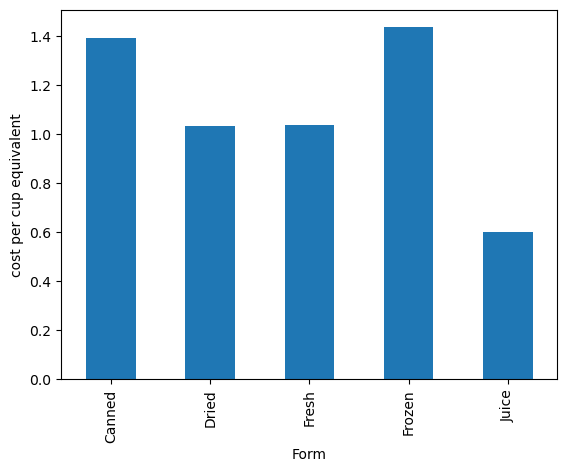

In [101]:
byForm = data.groupby("Form") #form here refers to state, ie fresh, frozen, juice, etc
byForm["CupEquivalentPrice"].mean().plot.bar(ylabel="cost per cup equivalent")
#this should get us an idea of relative costs per serving of fruit

CupEquivalentPrice    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

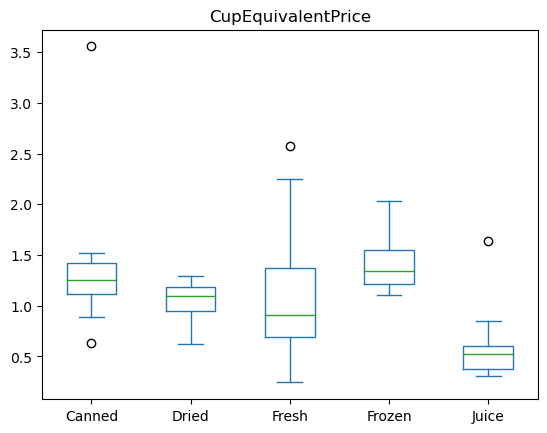

In [105]:
data.plot.box(column=["CupEquivalentPrice"], by="Form")
#getting a bit more granular
#here we can see that juice is the cheapest overall, 
#half of fresh fruits are still at under $1 per cup
#the other half of fresh fruits have a much wider spread in price
#leading to the slightly higher mean we saw previously

In [152]:
#let's check we have a similar amount of entries for each category
#in looking at the values for Fruit, we see some fruits don't have entries for every form
#first we'll need to remove some extra information from some names
#for now, we'll just care about the type of fruit




#TODO: with python, probably a better way to do this
fruits = data["Fruit"].values
for i in range(len(fruits)):
    for j in range(len(fruits[i])):
        if fruits[i][j] == ',' or fruits[i][j] == ' ':
            fruits[i] = fruits[i][:j]
            break
#print(fruits)


In [154]:
#let's focus on fruits with at least 2 entries
data2 = data.drop_duplicates(subset="Fruit", keep=False)

print(data2.index)
for i in data2.index:
    print(i)
    data = data.drop(index=i)
print(data["Fruit"].values)

Index([], dtype='int64')
['Apples' 'Apples' 'Apples' 'Apples' 'Apricots' 'Apricots' 'Apricots'
 'Apricots' 'Blackberries' 'Blackberries' 'Blueberries' 'Blueberries'
 'Cherries' 'Cherries' 'Fruit' 'Fruit' 'Grapefruit' 'Grapefruit' 'Grapes'
 'Grapes' 'Grapes' 'Grapes' 'Mangoes' 'Mangoes' 'Oranges' 'Oranges'
 'Oranges' 'Papaya' 'Papaya' 'Peaches' 'Peaches' 'Peaches' 'Peaches'
 'Pears' 'Pears' 'Pears' 'Pineapple' 'Pineapple' 'Pineapple' 'Pineapple'
 'Pineapple' 'Pineapple' 'Plum' 'Plum' 'Plum' 'Pomegranate' 'Pomegranate'
 'Raspberries' 'Raspberries' 'Strawberries' 'Strawberries']
